In [1]:
import numpy as np
import matplotlib.pyplot as plt
import macti.visual as mvis

In [2]:
def sol_exacta(x, TA, TB, S, L, k):
    """
    Calcula la temperatura usando la fórmula obtenida con Series de Taylor.

    Parameters
    ----------
    x: np.array
    Coordenadas donde se calcula la temperatura.

    TA: float
    Es la condición de frontera a la izquierda.
    
    TB: float
    Es la condición de frontera a la derecha.

    S: float
    es la fuente.
    
    L: float
    L es la longitud del dominio.
    
    k: float
    es la conductividad del material.
    
    Return
    ------
    al final esta función dibuja la solución.
    """
    return ((TB - TA)/L + S /(2*k) * (L - x) ) * x + TA

In [17]:
def error_absoluto(ve, va):
    """
    Calcula el error absoluto entre el valor exacto (ve) y el valor aproximado (va).
    """
    return np.linalg.norm(ve - va)

In [18]:
def conduccion_1d(k, S, L, TA, TB, N):
    """
    Calcula la temperatura en 1D mediante diferencias finitas.
    
    Parameters
    ----------    
    L: float
    L es la longitud del dominio.
    
    k: float
    es la conductividad del material.
    
    S: float
    es la fuente.
    
    TA: float
    Es la condición de frontera a la izquierda.
    
    TB: float
    Es la condición de frontera a la derecha.

    N: int
    Es el número de nodos internos (grados de libertad).
    
    Return
    ------
    al final esta función dibuja la solución.
    """

    # Cálculo de algunos parámetros numéricos
    h = L / (N+1)
    r = k / h**2
    
    # Definición de arreglos 
    T = np.zeros(N+2)
    b = np.zeros(N)
    A = np.zeros((N,N))

    # Se inicializa todo el arreglo b con S/r
    b[:] = S / r
    
    # Condiciones de frontera en el arreglo de la Temperatura.
    T[0] = TA
    T[-1] = TB
    
    # Se ajusta el véctor del lado derecho (RHS) con las condiciones de frontera.
    b[0] += TA
    b[-1] += TB

    # Se calculan las entradas de la matriz del sistema de ecuaciones lineales.
    A[0,0] = 2
    A[0,1] = -1
    for i in range(1,N-1):
        A[i,i] = 2
        A[i,i+1] = -1
        A[i,i-1] = -1
    A[-1,-2] = -1
    A[-1,-1] = 2

    # Se resuelve el sistema lineal.
    T[1:N+1] = np.linalg.solve(A,b)

    # Coordenadas para la solución exacta.
    xe = np.linspace(0,L,100)
    
    # Coordenadas para la solución numérica.
    xa = np.linspace(0,L,N+2)
    
    # Se calcula la solución exacta en las coordendas xe.
    TE = sol_exacta(xe, TA, TB, S, L, k)
    
    ea = error_absoluto(T, sol_exacta(xa,TA,TB,S,L,k))
    print(ea)
                        
    # Se realiza la gráfica de la solución.
    plt.plot(xa, T, 'o-')
    plt.plot(xe, TE)
    plt.xlabel('x')
    plt.ylabel('T')
    plt.show()

8.038873388460929e-14


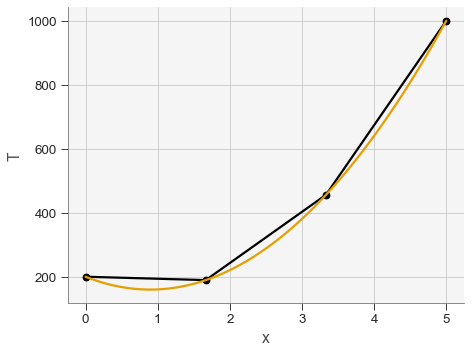

In [30]:
conduccion_1d(10.02, -1000.0, 5.0, 200, 1000, 2)

In [5]:
import ipywidgets as widgets

In [21]:
w = widgets.interactive(conduccion_1d,
                        k = widgets.fixed(0.02), 
                        S = widgets.FloatSlider(max=10.0, min=0.0, value=0, step=1.0), 
                        L = widgets.fixed(5.0), 
                        TA = widgets.fixed(200), 
                        TB = widgets.fixed(1000), 
                        N = widgets.IntSlider(max=10, min=4, value=4))

In [22]:
display(w)

interactive(children=(FloatSlider(value=0.0, description='S', max=10.0, step=1.0), IntSlider(value=4, descript…